---
title: Sum of Squares and Periodogram
---

Given a time series dataset $y_1, \dots, y_n$, the quantity $RSS(f)$ is defined by
\begin{equation*}
   RSS(f) := \min_{\beta_0, \beta_1, \beta_2} \sum_{t=1}^n \left(y_t - \beta_0 - \beta_1 \cos (2 \pi f t) - \beta_2 \sin(2 \pi f t) \right)^2
\end{equation*}
For each frequency $f$, $RSS(f)$ tells us how well the best sinusoid at frequency $f$ fits the data. This is used for identifying periodicities present in the data. 

In class today, we derived the following alternative formula for $RSS(f)$ which holds when $f \in (0, 1/2)$ is a Fourier frequency (i.e., $nf$ is an integer):
\begin{equation*}
   RSS(f) = \sum_{t} (y_t - \bar{y})^2 - 2I(f)
\end{equation*}
where
\begin{equation*}
   I(f) := \frac{1}{n} \left| \sum_{t=1}^n y_t e^{-2 \pi i f t} \right|^2
\end{equation*}
is called the Periodogram. As we shall discuss in the next lecture, the quantity
\begin{equation*}
 \sum_{t=1}^n y_t e^{-2 \pi i f t} 
\end{equation*}
when $f$ varies over the Fourier frequencies in $(0, 1/2)$ is called the Discrete Fourier Transform (DFT) of the data $y_1, \dots, y_n$. An efficient algorithm called FFT (Fast Fourier Transform) allows fast computation of the DFT. We shall discuss the DFT in more detail in the next lecture. 

Below, we illustrate computation of $RSS(f)$ (for Fourier frequencies in the range $(0, 1/2)$) using the formula given above. 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Consider the sunspots dataset which we analyzed in the last lecture. 

In [3]:
sunspots = pd.read_csv('SN_y_tot_V2.0.csv', header = None, sep = ';')
y = sunspots.iloc[:,1].values
n = len(y)

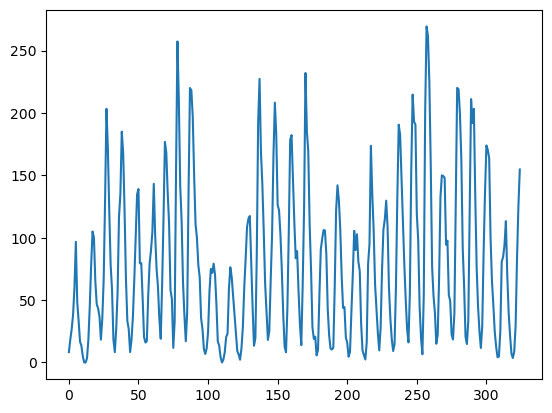

In [4]:
plt.plot(y)

In the last lecture, we used the following function for computing $RSS(f)$:

In [5]:
#In the last class, we used the following function for computing rss(f):
def rss(f):
    x = np.arange(1, n+1)
    xcos = np.cos(2 * np.pi * f * x)
    xsin = np.sin(2 * np.pi * f * x)
    X = np.column_stack([np.ones(n), xcos, xsin])
    md = sm.OLS(y, X).fit()
    ans = np.sum(md.resid ** 2)
    return ans

We evaluated $RSS(f)$ using the above function on a fine grid of frequencies in the range $(0, 1/2)$.

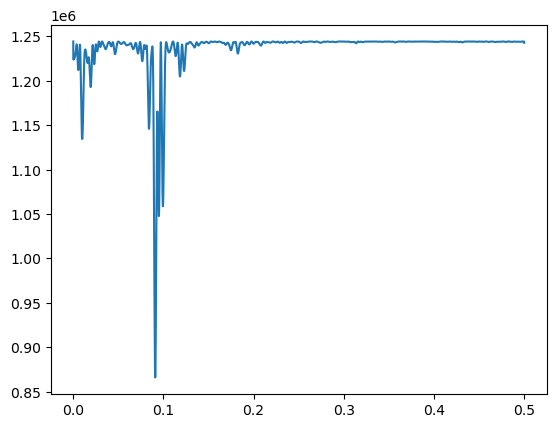

In [6]:
ngrid = 10000
allfvals = np.linspace(0, 0.5, ngrid)
rssvals = np.array([rss(f) for f in allfvals])
plt.plot(allfvals, rssvals)

Instead of using the grid constructed above, let us consider an alternative grid consisting of all **Fourier** frequencies in the range $(0, 0.5)$. 

325
[0.00307692 0.00615385 0.00923077 0.01230769 0.01538462 0.01846154
 0.02153846 0.02461538 0.02769231 0.03076923 0.03384615 0.03692308
 0.04       0.04307692 0.04615385 0.04923077 0.05230769 0.05538462
 0.05846154 0.06153846 0.06461538 0.06769231 0.07076923 0.07384615
 0.07692308 0.08       0.08307692 0.08615385 0.08923077 0.09230769
 0.09538462 0.09846154 0.10153846 0.10461538 0.10769231 0.11076923
 0.11384615 0.11692308 0.12       0.12307692 0.12615385 0.12923077
 0.13230769 0.13538462 0.13846154 0.14153846 0.14461538 0.14769231
 0.15076923 0.15384615 0.15692308 0.16       0.16307692 0.16615385
 0.16923077 0.17230769 0.17538462 0.17846154 0.18153846 0.18461538
 0.18769231 0.19076923 0.19384615 0.19692308 0.2        0.20307692
 0.20615385 0.20923077 0.21230769 0.21538462 0.21846154 0.22153846
 0.22461538 0.22769231 0.23076923 0.23384615 0.23692308 0.24
 0.24307692 0.24615385 0.24923077 0.25230769 0.25538462 0.25846154
 0.26153846 0.26461538 0.26769231 0.27076923 0.27384615 0.276923

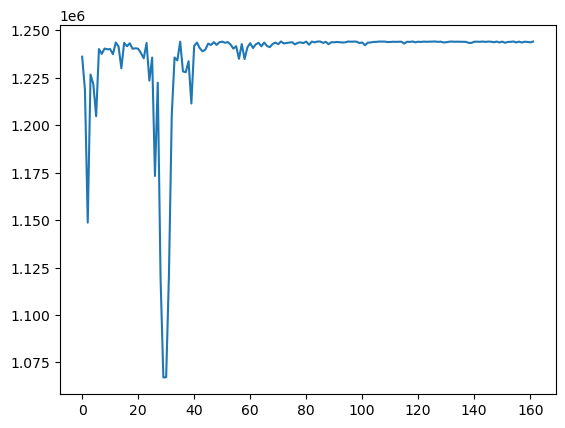

In [7]:
#Let us only compute rss(f) for Fourier frequencies:
print(n)
#If n is odd, the Fourier frequencies in (0, 0.5) are 1/n, 2/n, ..., (n-1)/(2n)
m = (n-1) // 2
fourier_freq = (np.arange(1, m+1))/(n)
print(fourier_freq)
#let us compute rss(f) for f in the Fourier grid
rss_fourier = np.array([rss(f) for f in fourier_freq])
plt.plot(rss_fourier)

Now we compute $RSS(f)$ for $f$ ranging in the Fourier grid using the connection to periodogram via the FFT. 

In [8]:
#Now we shall compute it using the FFT:
fft_y = np.fft.fft(y)
pgram_y = np.abs(fft_y[1:m + 1]) ** 2/n #we are picking up the entries 1,..,m of fft_y, then taking absolute values and squares, and then dividing by n
var_y = np.sum((y - np.mean(y)) ** 2)
rss_fft = var_y - 2 * pgram_y

Below, we plot the two different calculations of $RSS(f)$ (for $f$ ranging among Fourier frequencies) on the same figure. We want to demonstrate the two calculations lead to identical answers. 

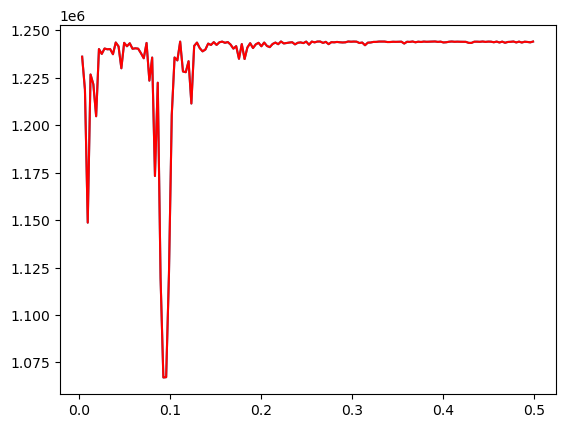

In [9]:
plt.plot(fourier_freq, rss_fourier)
plt.plot(fourier_freq, rss_fft, color = 'red')


The first method of directly computing $RSS(f)$ is actually quite computationally expensive. The second method (which leverages the connection to the Discrete Fourier Transform) is much more efficient because of the FFT algorithm. We shall illustrate this below using a very large audio dataset. 

The "Hear Piano Note - Middle C.mp3$ is an audio file consisting of about 14 seconds. It contains the sound of the Middle C note in the piano. The python library "Librosa" will be used for loading the audio file (see https://librosa.org/doc/latest/index.html for instructions on installing librosa, and tutorials etc.)

In [10]:
import librosa
y,sr=librosa.load("Hear Piano Note - Middle C.mp3")
n = len(y)
print(n)
print(sr)
print(n/sr)

301272
22050
13.66312925170068


Each second of the audio file is captured in $sr$ (which stands for "sampling rate" and whose default value is 22050) many datapoints. The total number of datapoints equals $sr$ muliplied by the number of seconds of the audio file. Clearly this is a time series dataset of a large size. The data (sound waveform) is plotted below.

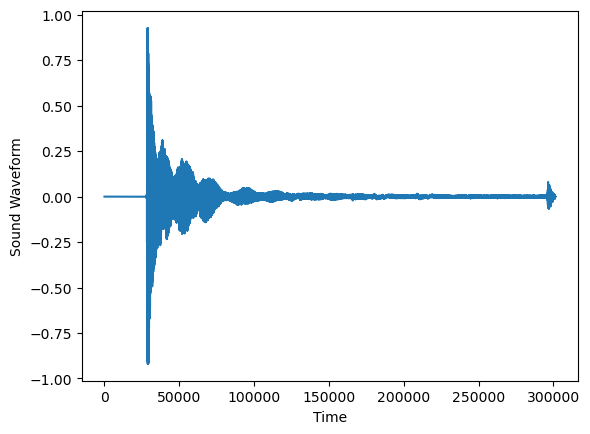

In [12]:
plt.plot(y)
plt.xlabel("Time")
plt.ylabel("Sound Waveform")
plt.show()

In [14]:
#In the last class, we used the following function for computing rss(f):
def rss(f):
    x = np.arange(1, n+1)
    xcos = np.cos(2 * np.pi * f * x)
    xsin = np.sin(2 * np.pi * f * x)
    X = np.column_stack([np.ones(n), xcos, xsin])
    md = sm.OLS(y, X).fit()
    ans = np.sum(md.resid ** 2)
    return ans

The following function computes $RSS(f)$ using the function used in last lecture on a grid of values. The number of grid values considered below is 10000 which is much smaller than the data size $n$. 

In [15]:
ngrid = 10000
allfvals = np.linspace(0, 0.5, ngrid)
rssvals = np.array([rss(f) for f in allfvals])
plt.plot(allfvals, rssvals)

KeyboardInterrupt: 

The above piece of code is taking too long to run. If we abandon it, and instead use the FFT-Periodogram connection to compute $RSS(f)$, the code runs way faster and gives the values of $RSS(f)$ on the Fourier grid which contains many more points than $10000$. 

In [13]:
fft_y = np.fft.fft(y)
m = (n // 2) - 1
pgram_y = (np.abs(fft_y[1:(m+1)]) ** 2)/n
var_y = np.sum((y - np.mean(y)) ** 2)
rss_fft = var_y - 2 * pgram_y

Text(0, 0.5, 'Periodogram Ordinate I(f)')

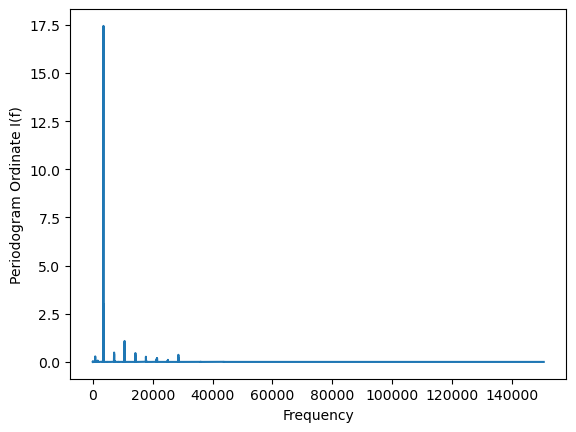

In [14]:
#plt.plot(rss_fft)
plt.plot(pgram_y)
plt.xlabel('Frequency')
plt.ylabel('Periodogram Ordinate I(f)')

Let us compute the frequency which maximizes the periodogram. 

In [16]:
fourier_freq = (np.arange(1, m+1))/(n)
peak_freq = fourier_freq[np.argmax(pgram_y)]
print(peak_freq)

0.011799968135107145


The frequency corresponding to the middle $C$ note on the piano is approximately 261.63 Hz (see e.g., https://en.wikipedia.org/wiki/C_(musical_note)). How does 261.63 Hz relate to the periodogram maximizing frequency (or, equivalently, RSS minimizing frequency) above? The connection between the two is obtained by multiplication by the sampling rate $sr$. The sinusoid $\cos (2 \pi f t)$ completes $f$ cycles in unit time. In this dataset, one unit of time is given by $1/sr$ seconds. So this sinusoid completes $f \times sr$ cycles in one sec which means that, in Hertz (which is the number of cycles per second), the frequency $f$ corresponds to $f \times sr$.  

In [18]:
peak_freq * sr #this is quite close to 261.63 Hz. 

260.18929737911253